<a href="https://colab.research.google.com/github/academyExcelleance/AIMLOPS/blob/master/end_to_end_learning_imp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [1]:
from pathlib import Path
import urllib.request
import pandas as pd
import numpy as np
import tarfile
from matplotlib import pyplot as plt


# Get the data

In [ ]:
def load_housing_data():
   if not Path("datasets/housing.tgz").is_file():
     Path("datasets").mkdir(parents=True, exist_ok=True)
     download_url = "https://github.com/ageron/data/raw/main/housing.tgz"
     urllib.request.urlretrieve(download_url, Path("datasets/housing.tgz"))
     with tarfile.open(Path("datasets/housing.tgz")) as housingData:
          housingData.extractall(path="datasets")


load_housing_data()

In [ ]:
housing_data = pd.read_csv("datasets/housing/housing.csv");
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Exploratory Data Analysis (EDA)

Check the followings of dataset of each column
  *   Tensor rank(shape)
  *   What are features and what are columns
  *   Data Type
  *   value count
  *   Separate numerical and categorical column
  *   Missing Value
  *   Check outlier (Histogram/Barplot)
  *   Pair plot against target column - check impact of individual feature on target
  *   coorelation between columns/features
  *   Check and separate if there is any temporal data
  *   Check if there is any column value is rare value category



In [ ]:
housing = housing_data.copy()

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*   25% (Q1): -121.800000 → 25% of the longitude are ≤ -121.800000.
*   50% (Median/Q2): -118.490000 → 50% of the longitude are ≤ -118.490000.
*   75% (Q3): -118.010000 → 75% of the longitude are ≤ -118.010000.



**Option #1**

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The above details indicate that total_bedrooms column has null value for (20640 - 20433) 207 rows. All columns are numerical except target (ocean_proximity)

In [ ]:
numerical_column = housing.select_dtypes(include=[np.number]).columns
categorical_column = housing.select_dtypes(exclude=[np.number]).columns

print(numerical_column)
print(categorical_column)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


Above is example how to separate categorcal and numerical columns. Here we do not require

**Option #2**

In [ ]:
for col in housing.columns:
  print(f"\033[1mFeathur: {col}\033[0m")
  print(f'Data TYpe: {housing[col].dtype}')
  print(f'Value count: {housing[col].count()}')
  print(f'Missing Value count: {housing[col].isnull().sum()}')
  print(f'Unique Value count: {housing[col].nunique()}')
  print()

Feathur: longitude
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 844

Feathur: latitude
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 862

Feathur: housing_median_age
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 52

Feathur: total_rooms
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 5926

Feathur: total_bedrooms
Data TYpe: float64
Value count: 20433
Missing Value count: 207
Unique Value count: 1923

Feathur: population
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 3888

Feathur: households
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 1815

Feathur: median_income
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 12928

Feathur: median_house_value
Data TYpe: float64
Value count: 20640
Missing Value count: 0
Unique Value count: 3842

Feathur: ocean_pr

As per above data, ocean_proximity  has 5 unique values, need to check unique values

total_bedrooms has 207 null values

Other than ocean_proximity all are numerical

In [ ]:
housing.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


As per above result, <1H OCEAN has high value (9136) whereas ISLAND has only 5 values. This is very low and not balanced. Need to add more data set for ISLAND

In [ ]:
numerical_column = [col for col in housing.columns if pd.api.types.is_numeric_dtype(housing[col])]
categorical_columns = [col for col in housing.columns if not pd.api.types.is_numeric_dtype(housing[col])]
print(categorical_columns)
print(numerical_column)

['ocean_proximity']
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


# Exploratory  Data Analysis - Visualize (EDA)

**Histogram** is applicable only for **numerical attributes**

A **histogram** is a type of bar plot that helps in visualizing the distribution of a dataset. It is widely used in data analysis to understand how values in a dataset are spread across ranges (or bins). This can ***reveal patterns, outliers, and the shape (like skewness or modality)*** of the data.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). We can either plot this one attribute at a time, or we can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute


**How a Histogram Helps in Data Analysis:**

***Understand Distribution:***

Reveals whether the data follows a normal distribution, is skewed, or has multiple peaks.

***Identify Outliers:***

Any bars that are separated from the rest indicate outliers.
Determine Central Tendency & Spread:

Shows where most data points lie (e.g., clustered around the mean).


***Detect Skewness:***

If the bars are unevenly spread, it suggests positive or negative skew in the data.

***Evaluate Data Binning:***

Helps group continuous data into ranges, making it easier to interpret.

Option #1 - Display Histogram using based on each column

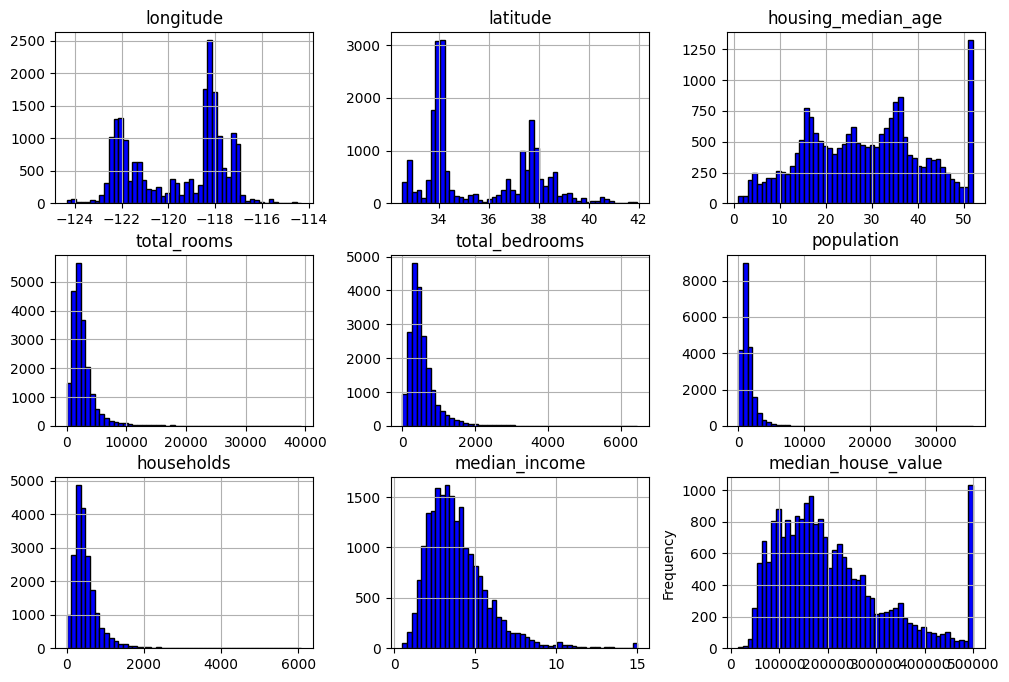

In [ ]:
# option 1 - hist on full dataframe , this handles numercal data set only
housing.hist(bins=50,color='blue', figsize=(12, 8),edgecolor='black', histtype='bar')
plt.ylabel("Frequency")
plt.show()
#for col in numerical_column:
    # option# 2 - use plt.hist - for each column
    #plt.hist(housing[col],bins=50,range=(housing[col].min(), housing[col].max()), color='blue', edgecolor='black',
    #alpha=0.7, rwidth=0.9, label=col, histtype='bar')

    #option# 3 - use hist on dataframe for each column
 #  housing[col].hist(bins=50,range=(housing[col].min(), housing[col].max()), color='blue', edgecolor='black',
 #  alpha=0.7, rwidth=0.9, label=col, histtype='bar')
 #  plt.title(col)
 #  plt.xlabel(col)
 #  plt.ylabel("Frequency")
 #  plt.legend()
 #  plt.show()


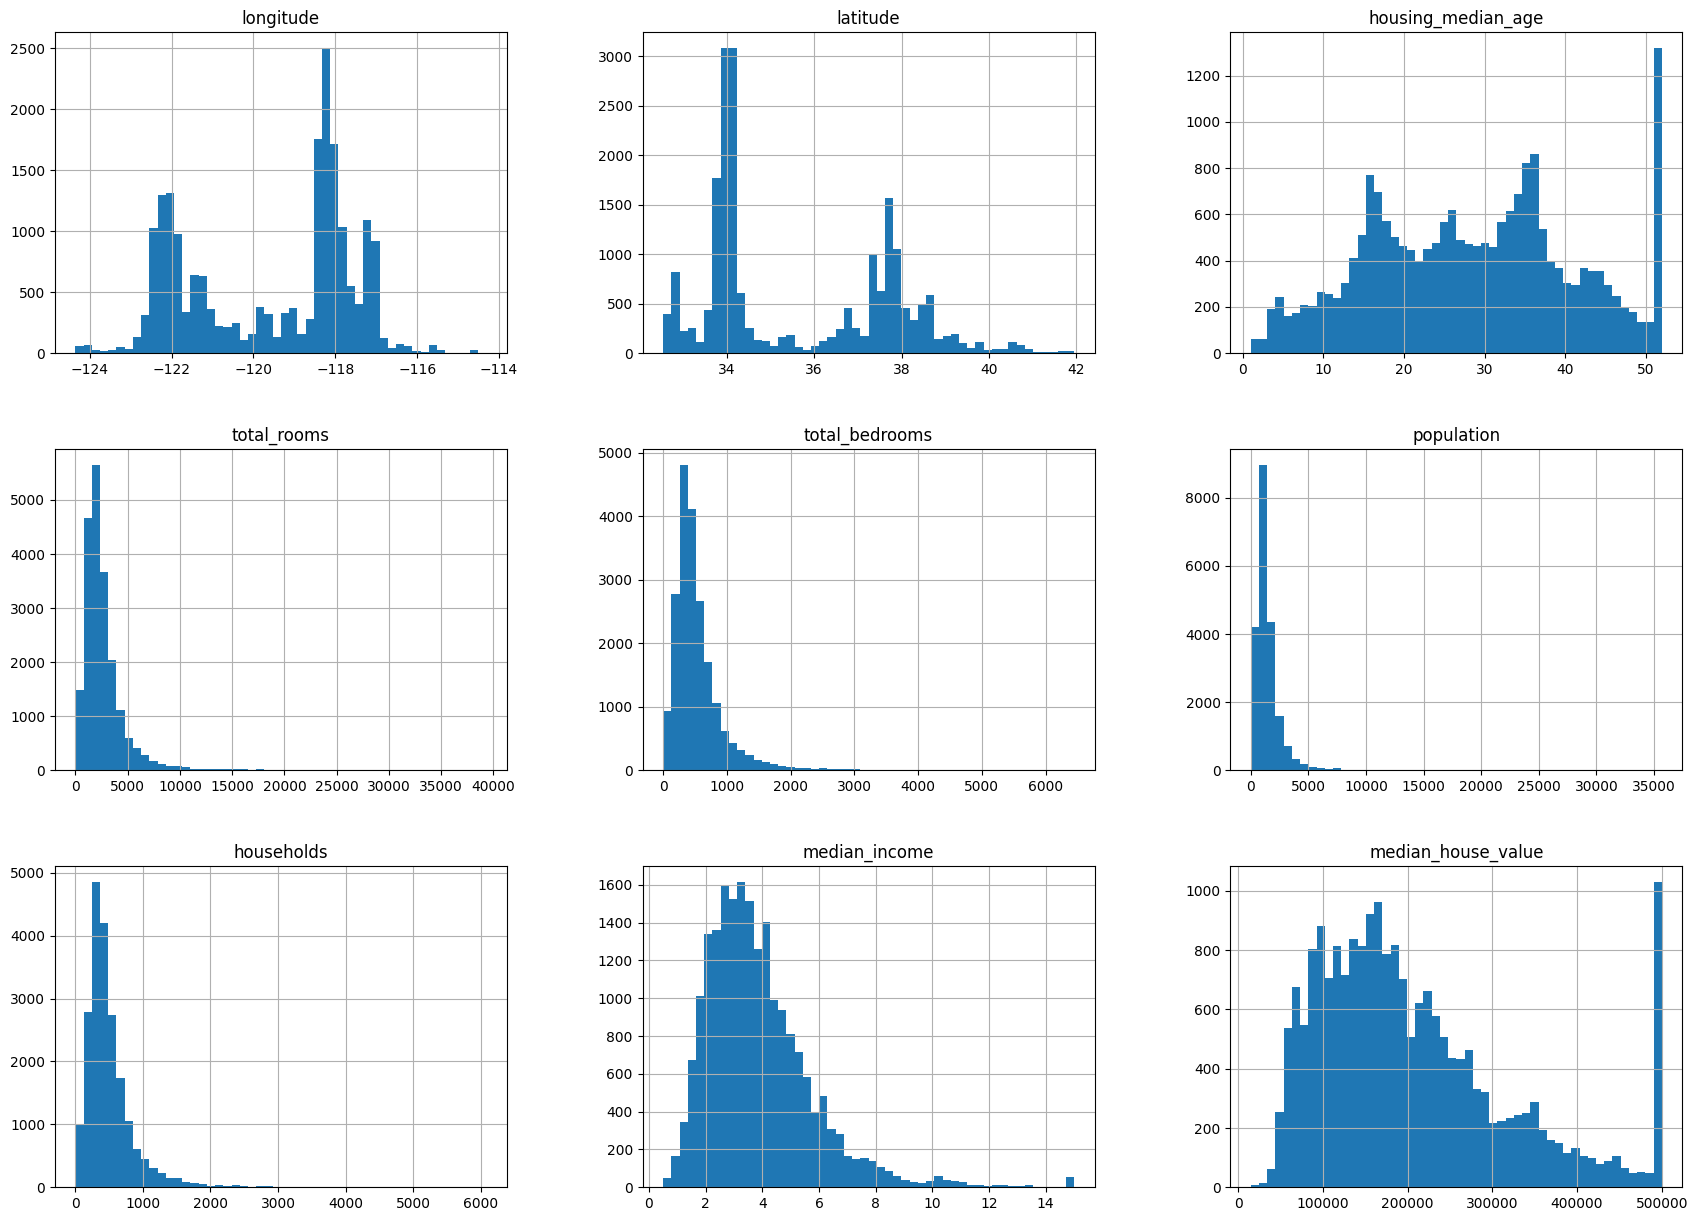

In [ ]:
import matplotlib.pyplot as plt

housing_data.hist(bins=50, figsize=(21,15))
plt.show()

In [ ]:
housing_data["income_cat"] = pd.cut(housing_data["median_income"], bins = [0.,1.5,3.0,4.5,6.,np.inf],
                                    labels=[1,2,3,4,5])

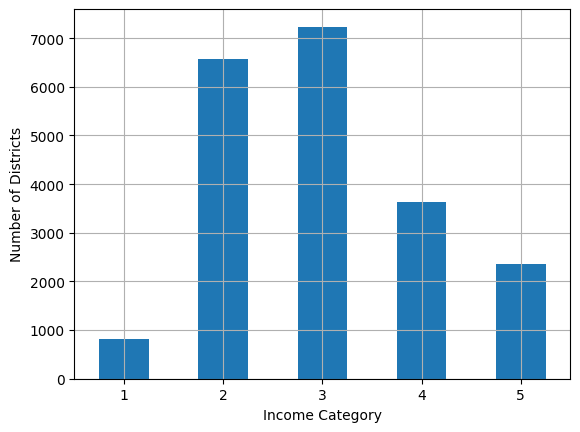

In [ ]:
housing_data["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data, test_size=0.2,
random_state=42,stratify=housing_data["income_cat"])

In [ ]:
test_set["income_cat"].value_counts().sort_index()/len(test_set)

,count
income_cat,
1,0.039971
2,0.318798
3,0.350533
4,0.176357
5,0.114341


In [ ]:
train_set["income_cat"].value_counts().sort_index()/len(train_set)

,count
income_cat,
1,0.039789
2,0.318859
3,0.350594
4,0.176296
5,0.114462


In [ ]:
 for set_ in (train_set , test_set):
   set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
test_set.shape

(4128, 10)

In [ ]:
housing_data_copy = train_set.copy()

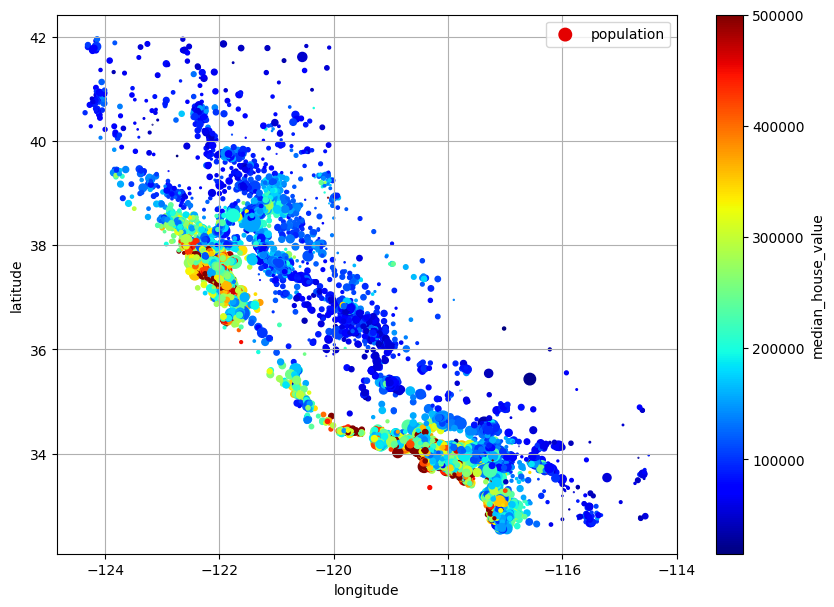

In [ ]:
 housing_data_copy.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing_data_copy["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [ ]:
housing_data = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

housing_num = housing_data.select_dtypes(include=[np.number] )

imputer.fit(housing_num)

print(imputer.statistics_)

housing_num.median().values


[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [ ]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
housing_cat = housing_data[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_label_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_label_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()[10]

array([0., 0., 0., 1., 0.])

In [ ]:
df_test = pd.DataFrame({"ocean_proximity":["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN",
"ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)